**1. Importing the Libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

**2. Load the Dataset**

In [5]:
df = pd.read_csv("passenger-data.csv")

In [6]:
df['Month']

0      1949-01
1      1949-02
2      1949-03
3      1949-04
4      1949-05
        ...   
139    1960-08
140    1960-09
141    1960-10
142    1960-11
143    1960-12
Name: Month, Length: 144, dtype: object

**3. Data preprocessing**

In [6]:
df['Month'].size

144

In [7]:
type(df['Month'])

pandas.core.series.Series

In [8]:
# Converting 'Month' column to datetime type
df['Month'] = pd.to_datetime(df['Month'])

In [9]:
df['Month']

0     1949-01-01
1     1949-02-01
2     1949-03-01
3     1949-04-01
4     1949-05-01
         ...    
139   1960-08-01
140   1960-09-01
141   1960-10-01
142   1960-11-01
143   1960-12-01
Name: Month, Length: 144, dtype: datetime64[ns]

In [10]:
type(df)

pandas.core.frame.DataFrame

In [11]:
type(df['Month'])

pandas.core.series.Series

In [12]:
# Set entries of month cloumn as index of the DataFrame 
df.set_index("Month", inplace = True)

In [13]:
df

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


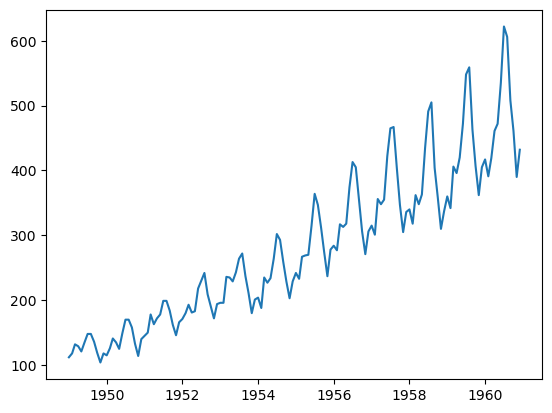

In [14]:
plt.plot(df.Passengers)
# plt.plot(df.Passengers)

In [15]:
df['Passengers']

Month
1949-01-01    112
1949-02-01    118
1949-03-01    132
1949-04-01    129
1949-05-01    121
             ... 
1960-08-01    606
1960-09-01    508
1960-10-01    461
1960-11-01    390
1960-12-01    432
Name: Passengers, Length: 144, dtype: int64

In [16]:
df.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq=None)

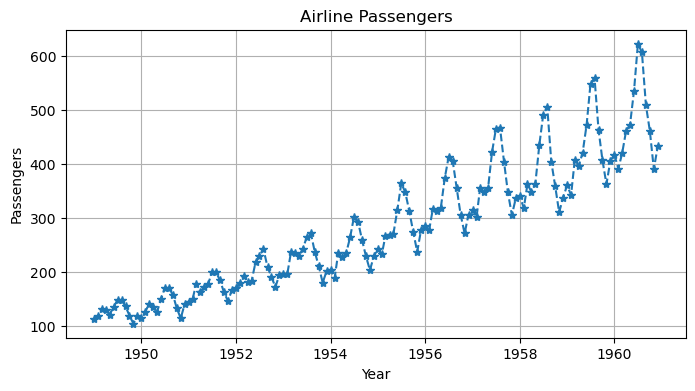

In [17]:
# Plotting the number of Passengers for every month of the year
plt.figure(figsize=(8, 4))
plt.plot(df.index, df.Passengers, '--',marker= "*" )
plt.grid()
plt.title("Airline Passengers")
plt.xlabel('Year')
plt.ylabel('Passengers')
plt.show()

3.1 Handling the Missing Values

In [18]:
# Check for the missing values
df.isnull().sum()

Passengers    0
dtype: int64

In [19]:
df.isnull().sum()

Passengers    0
dtype: int64

In [20]:
df.isnull().any()

Passengers    False
dtype: bool

In [21]:
df.isnull().all()

Passengers    False
dtype: bool

In [22]:
# In case of presence of missing values, we shall handle it by

# Make copy of our dataset and make some nulls
df_copy = df.copy()

In [23]:
df_copy

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


In [24]:
# Fraction out 10% of DataFrame and store in rows
rows = df_copy.sample(frac = 0.1, random_state = 0)

In [25]:
rows

,Passengers
Month,
1949-08-01,148
1956-06-01,374
1957-02-01,301
1951-03-01,178
1958-03-01,362
1959-09-01,463
1953-12-01,201
1950-11-01,114
1959-10-01,407


In [26]:
rows.size

14

In [27]:
rows['Passengers']

Month
1949-08-01    148
1956-06-01    374
1957-02-01    301
1951-03-01    178
1958-03-01    362
1959-09-01    463
1953-12-01    201
1950-11-01    114
1959-10-01    407
1950-05-01    125
1959-07-01    548
1959-01-01    360
1952-05-01    183
1952-10-01    191
Name: Passengers, dtype: int64

In [28]:
# Set sampled out values to NULL
rows['Passengers'] = np.nan

In [29]:
rows['Passengers']

Month
1949-08-01   NaN
1956-06-01   NaN
1957-02-01   NaN
1951-03-01   NaN
1958-03-01   NaN
1959-09-01   NaN
1953-12-01   NaN
1950-11-01   NaN
1959-10-01   NaN
1950-05-01   NaN
1959-07-01   NaN
1959-01-01   NaN
1952-05-01   NaN
1952-10-01   NaN
Name: Passengers, dtype: float64

In [30]:
rows.index

DatetimeIndex(['1949-08-01', '1956-06-01', '1957-02-01', '1951-03-01',
               '1958-03-01', '1959-09-01', '1953-12-01', '1950-11-01',
               '1959-10-01', '1950-05-01', '1959-07-01', '1959-01-01',
               '1952-05-01', '1952-10-01'],
              dtype='datetime64[ns]', name='Month', freq=None)

In [31]:
# replace those values in df_copy
df_copy.loc[rows.index, "Passengers"] = rows['Passengers']

In [32]:
df_copy

,Passengers
Month,
1949-01-01,112.0
1949-02-01,118.0
1949-03-01,132.0
1949-04-01,129.0
1949-05-01,121.0
...,...
1960-08-01,606.0
1960-09-01,508.0
1960-10-01,461.0


In [33]:
df_copy.isnull().sum()

Passengers    14
dtype: int64

In [34]:
# Fill the NULL values: Imputation - Forward Fill
df_copy_ffill = df_copy.fillna(method = 'ffill')

C:\Users\as\AppData\Local\Temp\ipykernel_13204\2650192012.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_copy_ffill = df_copy.fillna(method = 'ffill')


In [35]:
df_copy_ffill.isnull().sum()

Passengers    0
dtype: int64

In [36]:
# Fill the NULL values: Imputation - Backward Fill
df_copy_bfill = df_copy.fillna(method = 'bfill')

C:\Users\as\AppData\Local\Temp\ipykernel_13204\1050407276.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_copy_bfill = df_copy.fillna(method = 'bfill')


In [37]:
df_copy_bfill.isnull().sum()

Passengers    0
dtype: int64

In [38]:
# Fill the NULL values: Interpolation - Forward Fill
df_copy_LIF = df_copy.interpolate(method = "linear", limit_direction='forward')

In [39]:
df_copy_LIF.isnull().sum()

Passengers    0
dtype: int64

In [40]:
# Fill the NULL values: Interpolation - Backward Fill
df_copy_LIB = df_copy.interpolate(method = "linear", limit_direction='backward')

In [41]:
df_copy_LIB.isnull().sum()

Passengers    0
dtype: int64

In [42]:
# Resampling
# Fill the NULL values: Downsample to quaterly data points (3 Months)
df_quaterly = df.resample('3M').mean()

In [43]:
df_hlf=df.resample('1Y').mean()

In [44]:
df_hlf.size

12

In [45]:
df_quaterly

,Passengers
Month,
1949-01-31,112.000000
1949-04-30,126.333333
1949-07-31,134.666667
1949-10-31,134.333333
1950-01-31,112.333333
1950-04-30,134.000000
1950-07-31,148.000000
1950-10-31,153.666667
1951-01-31,133.000000


In [46]:
df_quaterly.size

49

In [47]:
df_quaterly.isnull().any()

Passengers    False
dtype: bool

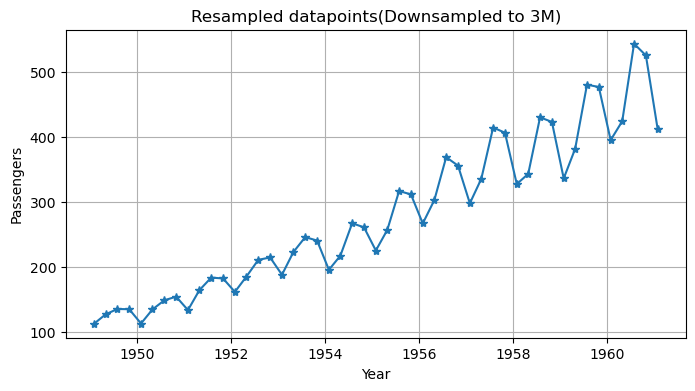

In [48]:
plt.figure(figsize = (8,4))
plt.plot(df_quaterly.index, df_quaterly.Passengers, '-', marker='*')
plt.grid()
plt.xlabel('Year')
plt.title("Resampled datapoints(Downsampled to 3M)")
plt.ylabel('Passengers')
plt.show()

In [49]:
df.resample('D').mean().isnull().sum()

Passengers    4209
dtype: int64

In [50]:
# Fill the NULL values: Upsample to daily data points (day wise)
df_daily = df.resample('D').mean()

In [51]:
df_daily

,Passengers
Month,
1949-01-01,112.0
1949-01-02,NaN
1949-01-03,NaN
1949-01-04,NaN
1949-01-05,NaN
...,...
1960-11-27,NaN
1960-11-28,NaN
1960-11-29,NaN


In [52]:
df_daily.size

4353

In [53]:
df_daily.isnull().sum()

Passengers    4209
dtype: int64

In [54]:
# Non-null values
df_daily.size - df_daily.isna().sum()

Passengers    144
dtype: int64

In [55]:
df_daily.Passengers[df_daily.Passengers.isnull()==False]

Month
1949-01-01    112.0
1949-02-01    118.0
1949-03-01    132.0
1949-04-01    129.0
1949-05-01    121.0
              ...  
1960-08-01    606.0
1960-09-01    508.0
1960-10-01    461.0
1960-11-01    390.0
1960-12-01    432.0
Name: Passengers, Length: 144, dtype: float64

In [56]:
df_daily.Passengers[df_daily.Passengers.isnull()==False].shape

(144,)

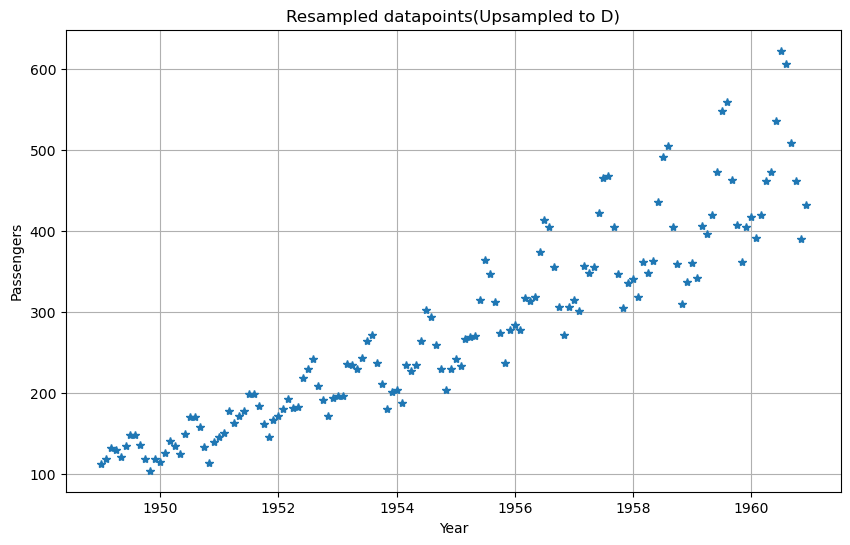

In [57]:
plt.figure(figsize=(10, 6))
plt.plot(df_daily.index, df_daily.Passengers, '--', marker='*')
plt.title("Resampled datapoints(Upsampled to D)")
plt.grid()
plt.xlabel('Year')
plt.ylabel('Passengers')
plt.show()

In [58]:
# Fill the NULL values: Moving Average Smoothing (Window slides 12 times)
df_MA = df.copy()
MA = df_MA['Passengers'].rolling(12).mean()

In [59]:
MA

Month
1949-01-01           NaN
1949-02-01           NaN
1949-03-01           NaN
1949-04-01           NaN
1949-05-01           NaN
                 ...    
1960-08-01    463.333333
1960-09-01    467.083333
1960-10-01    471.583333
1960-11-01    473.916667
1960-12-01    476.166667
Name: Passengers, Length: 144, dtype: float64

In [60]:
MA.loc['1949-11-01']

nan

In [61]:
# Mean starts from month 12(Dec), as window size is 12
MA.loc['1949-12-01']

126.66666666666667

In [62]:
MA.isna().sum()

11

In [63]:
MA.size

144

In [64]:
# Window size is 12 months, with 11 NULLs
(144-11)/12

11.083333333333334

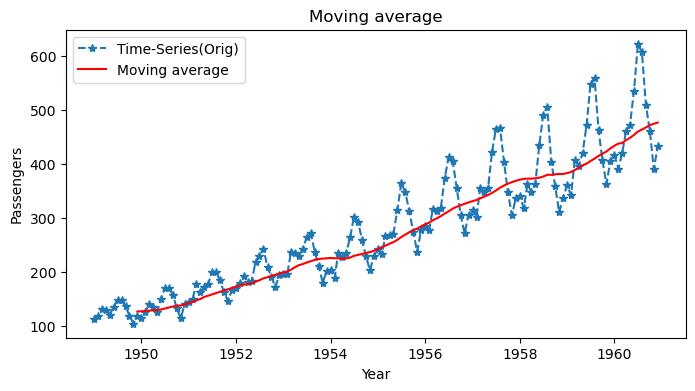

In [65]:
plt.figure(figsize=(8,4))
plt.plot(df.index, df.Passengers, '--',marker="*" ,label = 'Time-Series(Orig)')
plt.plot(MA.index, MA, '-', color='red', label = 'Moving average')
plt.title("Moving average")
plt.xlabel('Year')
plt.ylabel('Passengers')
plt.legend(loc="best")
plt.show()

**3.2** Time Series **E**xploratory **D**ata **A**nalysis

In [66]:
import statsmodels.api as sm
from pylab import rcParams

In [67]:
# Statsmodels' API provides a comprehensive set of classes and functions that allow users to easily access and manipulate data,
# as well as build statistical models. It also includes a variety of visualization tools, including time series plots, boxplots, and scatterplots.

In [68]:
# seasonal_decompose decomposes a time series into trend, seasonality and noise in one line of code.

In [69]:
# Additive

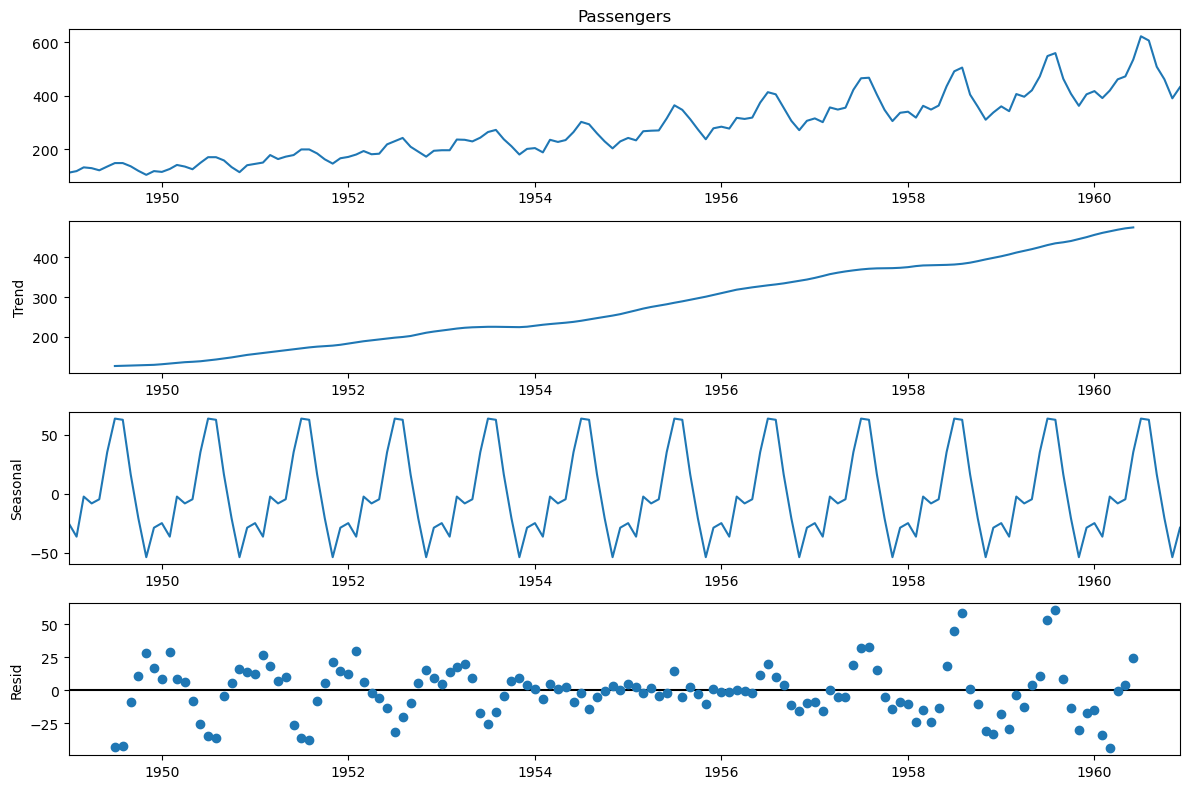

In [70]:
rcParams['figure.figsize'] = 12, 8
# A object with seasonal, trend, and resid attributes
# Y[t] = T[t] + S[t] + e[t]
decompose_series = sm.tsa.seasonal_decompose(df['Passengers'], model = 'additive')
decompose_series.plot()
plt.show()

In [71]:
decompose_series

In [72]:
type(decompose_series)

statsmodels.tsa.seasonal.DecomposeResult

In [73]:
decompose_series.resid.isnull().sum()

12

In [74]:
decompose_series.resid[decompose_series.resid.isnull()==False]

Month
1949-07-01   -42.622475
1949-08-01   -42.073232
1949-09-01    -8.478535
1949-10-01    11.059343
1949-11-01    28.593434
                ...    
1960-02-01   -34.186869
1960-03-01   -43.967172
1960-04-01    -0.296717
1960-05-01     3.756313
1960-06-01    24.555556
Name: resid, Length: 132, dtype: float64

In [75]:
decompose_series.seasonal

Month
1949-01-01   -24.748737
1949-02-01   -36.188131
1949-03-01    -2.241162
1949-04-01    -8.036616
1949-05-01    -4.506313
                ...    
1960-08-01    62.823232
1960-09-01    16.520202
1960-10-01   -20.642677
1960-11-01   -53.593434
1960-12-01   -28.619949
Name: seasonal, Length: 144, dtype: float64

In [76]:
decompose_series.seasonal.isna().sum()

0

In [77]:
decompose_series.trend

Month
1949-01-01   NaN
1949-02-01   NaN
1949-03-01   NaN
1949-04-01   NaN
1949-05-01   NaN
              ..
1960-08-01   NaN
1960-09-01   NaN
1960-10-01   NaN
1960-11-01   NaN
1960-12-01   NaN
Name: trend, Length: 144, dtype: float64

In [78]:
decompose_series.trend.isna().sum()

12

In [79]:
# Multiplicative

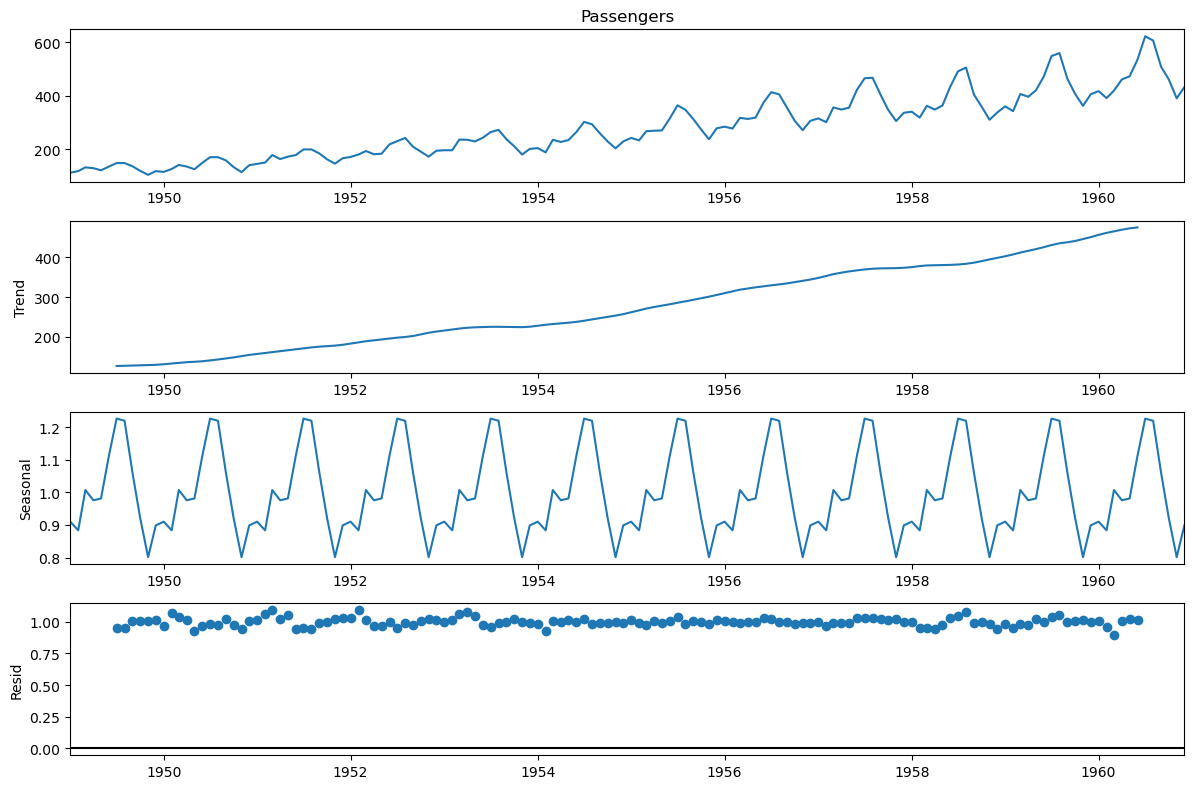

In [80]:
rcParams['figure.figsize'] = 12, 8
# A object with seasonal, trend, and resid attributes
# Y[t] = T[t] * S[t] * e[t]
decompose_series1 = sm.tsa.seasonal_decompose(df['Passengers'], model = 'multiplicative')
decompose_series1.plot()
plt.show()

In [81]:
decompose_series1.trend

Month
1949-01-01   NaN
1949-02-01   NaN
1949-03-01   NaN
1949-04-01   NaN
1949-05-01   NaN
              ..
1960-08-01   NaN
1960-09-01   NaN
1960-10-01   NaN
1960-11-01   NaN
1960-12-01   NaN
Name: trend, Length: 144, dtype: float64

In [82]:
decompose_series1.trend.isnull().sum()

12

In [83]:
decompose_series1.trend[decompose_series1.trend.isnull()==False]

Month
1949-07-01    126.791667
1949-08-01    127.250000
1949-09-01    127.958333
1949-10-01    128.583333
1949-11-01    129.000000
                 ...    
1960-02-01    461.375000
1960-03-01    465.208333
1960-04-01    469.333333
1960-05-01    472.750000
1960-06-01    475.041667
Name: trend, Length: 132, dtype: float64

In [84]:
# This is because trend won't come into picture at the start and end of period
decompose_series1.trend[decompose_series1.trend.isnull()==True]

Month
1949-01-01   NaN
1949-02-01   NaN
1949-03-01   NaN
1949-04-01   NaN
1949-05-01   NaN
1949-06-01   NaN
1960-07-01   NaN
1960-08-01   NaN
1960-09-01   NaN
1960-10-01   NaN
1960-11-01   NaN
1960-12-01   NaN
Name: trend, dtype: float64

In [85]:
decompose_series1.seasonal

Month
1949-01-01    0.910230
1949-02-01    0.883625
1949-03-01    1.007366
1949-04-01    0.975906
1949-05-01    0.981378
                ...   
1960-08-01    1.219911
1960-09-01    1.060492
1960-10-01    0.921757
1960-11-01    0.801178
1960-12-01    0.898824
Name: seasonal, Length: 144, dtype: float64

In [86]:
decompose_series1.seasonal.isnull().sum()

0

In [87]:
decompose_series1.resid

Month
1949-01-01   NaN
1949-02-01   NaN
1949-03-01   NaN
1949-04-01   NaN
1949-05-01   NaN
              ..
1960-08-01   NaN
1960-09-01   NaN
1960-10-01   NaN
1960-11-01   NaN
1960-12-01   NaN
Name: resid, Length: 144, dtype: float64

In [88]:
decompose_series1.resid.isnull().sum()

12

In [89]:
decompose_series1.resid[decompose_series1.resid.isnull()==False]

Month
1949-07-01    0.951664
1949-08-01    0.953401
1949-09-01    1.002220
1949-10-01    1.004028
1949-11-01    1.006270
                ...   
1960-02-01    0.959079
1960-03-01    0.894086
1960-04-01    1.006495
1960-05-01    1.017359
1960-06-01    1.012079
Name: resid, Length: 132, dtype: float64

In [90]:
# The decomposed time series show an obvious increasing trend and seasonality variations. We have initially plotted the moving average
# over the last 12 months which showed that it varies with time. This suggests that the data is not 'Stationary'.
# We will now perform 'ADF test' to confirm this speculation

In [91]:
from statsmodels.tsa.stattools import adfuller
adf_res = adfuller(df['Passengers'])
# adfuller: Augmented Dickey-Fuller test used for unit root in univariate process in process of serial correlation

In [92]:
# The adfuller function returns a tuple of statistics from the ADF test such as the Test Statistic, P-Value, Number of Lags Used, 
# Number of Observations used for the ADF regression
adf_res

(0.8153688792060497,
 0.991880243437641,
 13,
 130,
 {'1%': -3.4816817173418295,
  '5%': -2.8840418343195267,
  '10%': -2.578770059171598},
 996.692930839019)

In [93]:
adf_res[4].items()

dict_items([('1%', -3.4816817173418295), ('5%', -2.8840418343195267), ('10%', -2.578770059171598)])

In [94]:
print(f" p value is {adf_res[1]}")

 p value is 0.991880243437641


In [95]:
print(f'ADF Statistic: {adf_res[0]}')
print(f'p-value: {adf_res[1]}')
print(f'No. of lags used: {adf_res[2]}')
print(f'No. of observations used: {adf_res[3]}')
print('Critical Values at each significance level:')
for k, v in adf_res[4].items():
  print(f'  {k}: {v}')
print(f'icbest-maximized information criterion: {adf_res[5]}')

ADF Statistic: 0.8153688792060497
p-value: 0.991880243437641
No. of lags used: 13
No. of observations used: 130
Critical Values at each significance level:
  1%: -3.4816817173418295
  5%: -2.8840418343195267
  10%: -2.578770059171598
icbest-maximized information criterion: 996.692930839019


In [96]:
# from the results obtained, the p-value is greater than the critial value at a 5% significance level 
# ADF statistic is greater than any of critical values obtained
# This confirms that series is indeed 'non-stationary'

**3.3** Convert time series into stationary by removing trend and seasonality

In [97]:
# Transformation and Differencing

# Transformation
df_log = np.log(df)

In [98]:
df

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


In [99]:
df_log

,Passengers
Month,
1949-01-01,4.718499
1949-02-01,4.770685
1949-03-01,4.882802
1949-04-01,4.859812
1949-05-01,4.795791
...,...
1960-08-01,6.406880
1960-09-01,6.230481
1960-10-01,6.133398


In [100]:
# Differencing
df_diff = df_log.diff(periods = 1)

In [101]:
# Calculating the difference from its previous value, periods=1 (default) is the difference from its previous value
df_diff

,Passengers
Month,
1949-01-01,NaN
1949-02-01,0.052186
1949-03-01,0.112117
1949-04-01,-0.022990
1949-05-01,-0.064022
...,...
1960-08-01,-0.026060
1960-09-01,-0.176399
1960-10-01,-0.097083


In [102]:
df_diff.rolling(12)

Rolling [window=12,center=False,axis=0,method=single]

In [103]:
df_diff.rolling(12).mean()


,Passengers
Month,
1949-01-01,NaN
1949-02-01,NaN
1949-03-01,NaN
1949-04-01,NaN
1949-05-01,NaN
...,...
1960-08-01,0.006728
1960-09-01,0.007730
1960-10-01,0.010382


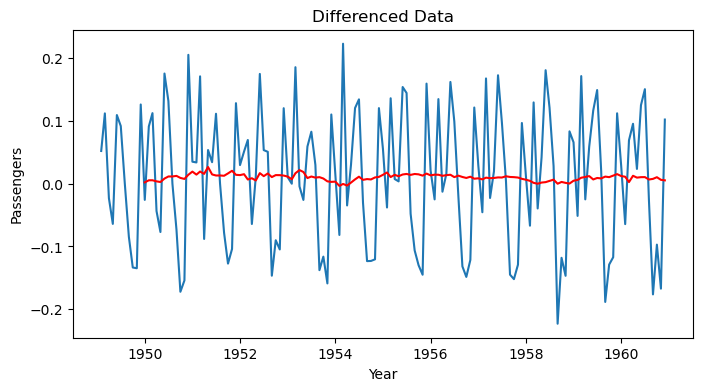

In [106]:
plt.figure(figsize=(8,4))
plt.plot(df_diff.index, df_diff.Passengers, '-')
plt.title("Differenced Data")
plt.xlabel("Year")
plt.ylabel("Passengers")
plt.plot(df_diff.rolling(12).mean(), color='red')
plt.show()

In [112]:
# plt.plot(np.log(df.rolling(10)).mean(),color='red')
# plt.plot(df.rolling(4).mean(),color='blue')

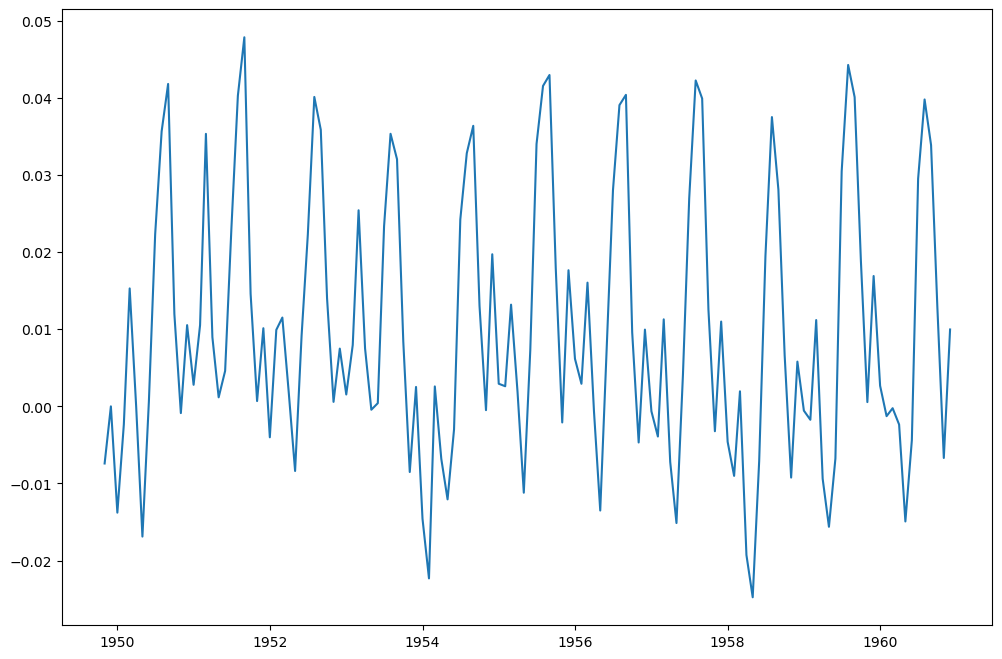

In [107]:
plt.plot(df_diff.rolling(10).mean())

In [ ]:
# df_diff.rolling(12).mean() gives the dataframe that is 'stationary'

**4. Time Series Forecasting using Stochastic Models**

In [113]:
# importing Auto Correlation and Partial Auto Correlation Functions
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [114]:
type(df_diff)

pandas.core.frame.DataFrame

In [115]:
df_diff['Passengers']

Month
1949-01-01         NaN
1949-02-01    0.052186
1949-03-01    0.112117
1949-04-01   -0.022990
1949-05-01   -0.064022
                ...   
1960-08-01   -0.026060
1960-09-01   -0.176399
1960-10-01   -0.097083
1960-11-01   -0.167251
1960-12-01    0.102279
Name: Passengers, Length: 144, dtype: float64

In [116]:
df_diff.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq=None)

In [117]:
type(df_diff['Passengers'])

pandas.core.series.Series

In [118]:
df_diff.isna().sum()

Passengers    1
dtype: int64

In [119]:
df_diff.dropna(inplace=True)

In [120]:
df_diff.isna().sum()

Passengers    0
dtype: int64

<Figure size 600x400 with 0 Axes>

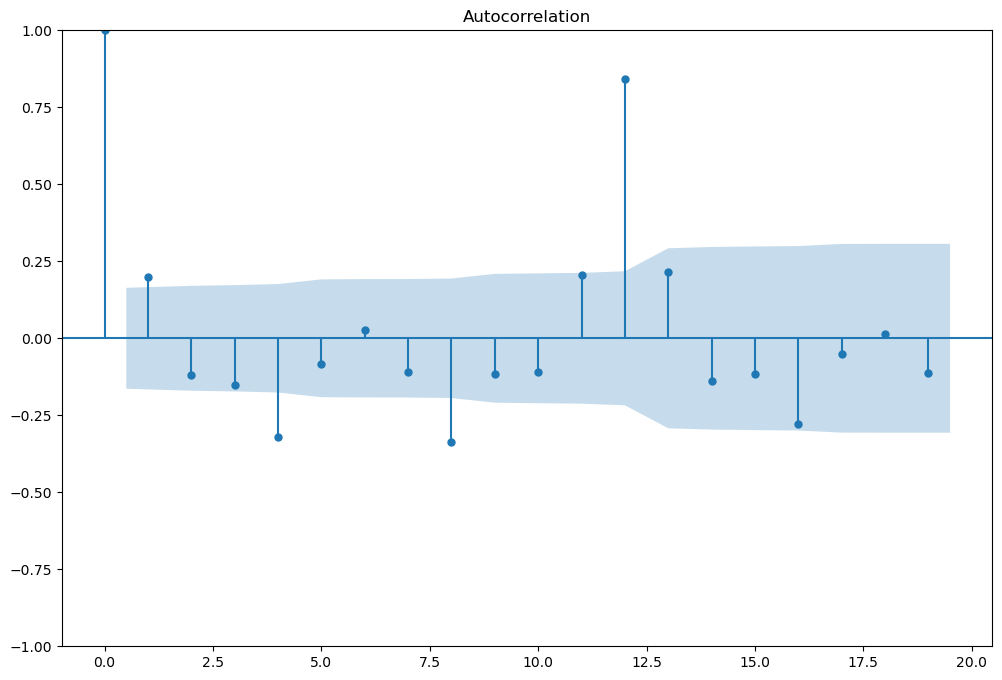

<Figure size 800x400 with 0 Axes>

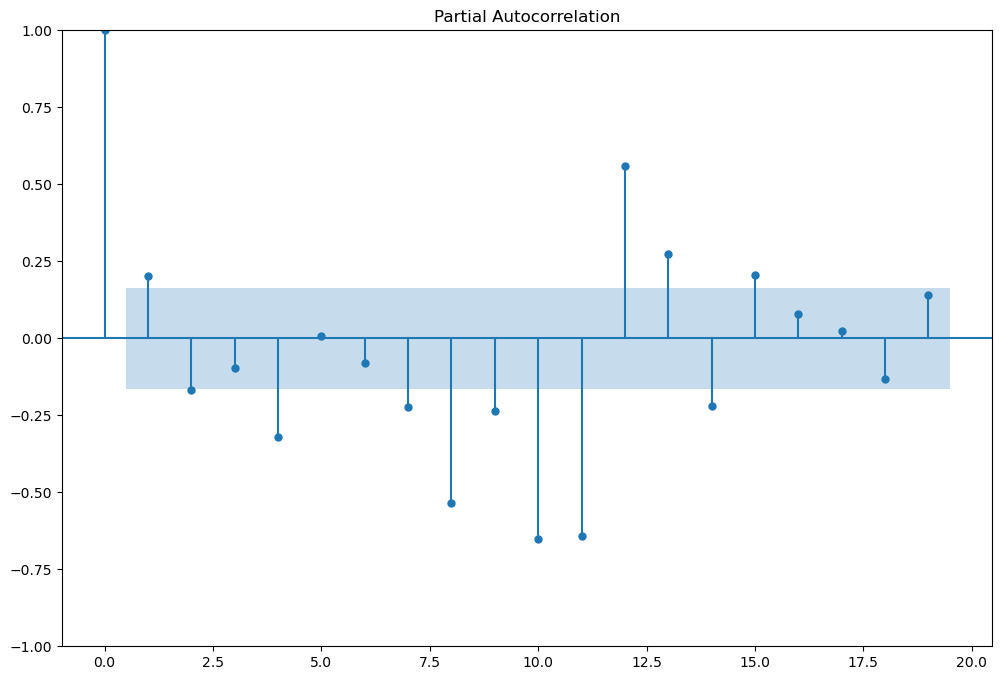

In [124]:
# ACF
plt.figure(figsize=(6,4))
plot_acf(df_diff['Passengers'], lags = range(0, 20))
plt.show()

# PACF
plt.figure(figsize=(8,4))
plot_pacf(df_diff['Passengers'], lags = range(0, 20))
plt.show()

In [ ]:
# The shaded regions in the plots are the confidence intervals. The lags where the PACF
# and ACF charts cross this region are the values for p and q respectively. In both plots, 
# p=q=1. 

In [ ]:
# The shaded regions in the plots are the confidence intervals. The lags where the PACF and
# ACF charts cross this region are the values for p and q respectively.
# In the ACF plot, there is one lag that crosses the significance level hence, q=1. Similarly
# in the PACF plot, p=2 

C:\Users\as\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\as\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\as\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


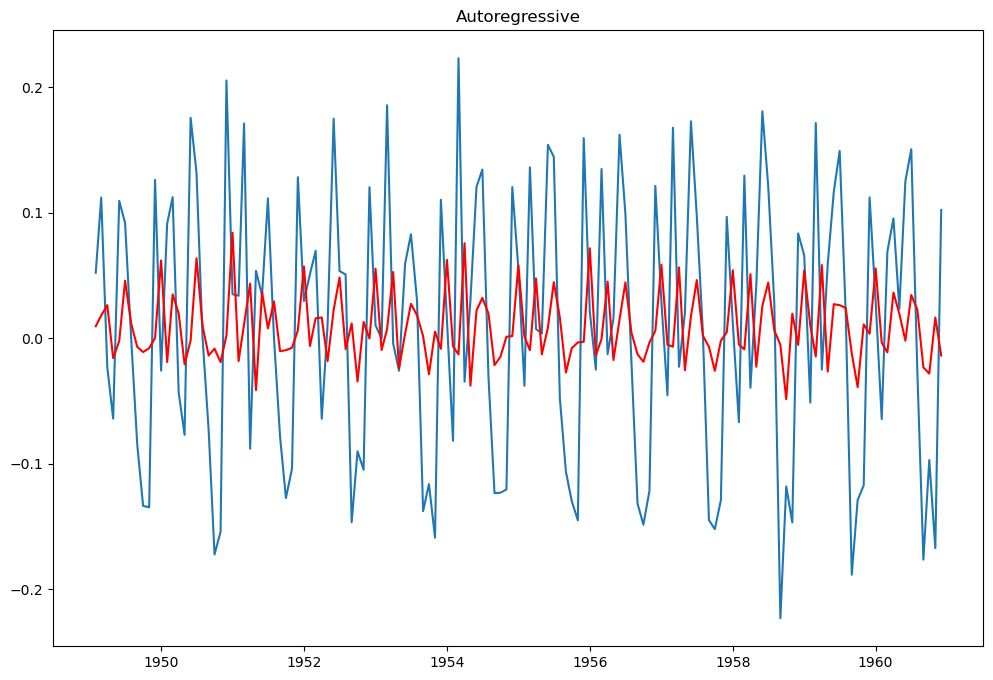

In [125]:
# Auto Regressive, Moving Average, ARIMA(p, d, q)
from statsmodels.tsa.arima.model import ARIMA

# Auto Regressive
AR_model = ARIMA(df_diff, order=(2, 0, 0))
AR_model_results = AR_model.fit()
plt.plot(df_diff)
plt.title("Autoregressive")
plt.plot(AR_model_results.fittedvalues, color = 'red')

C:\Users\as\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\as\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\as\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


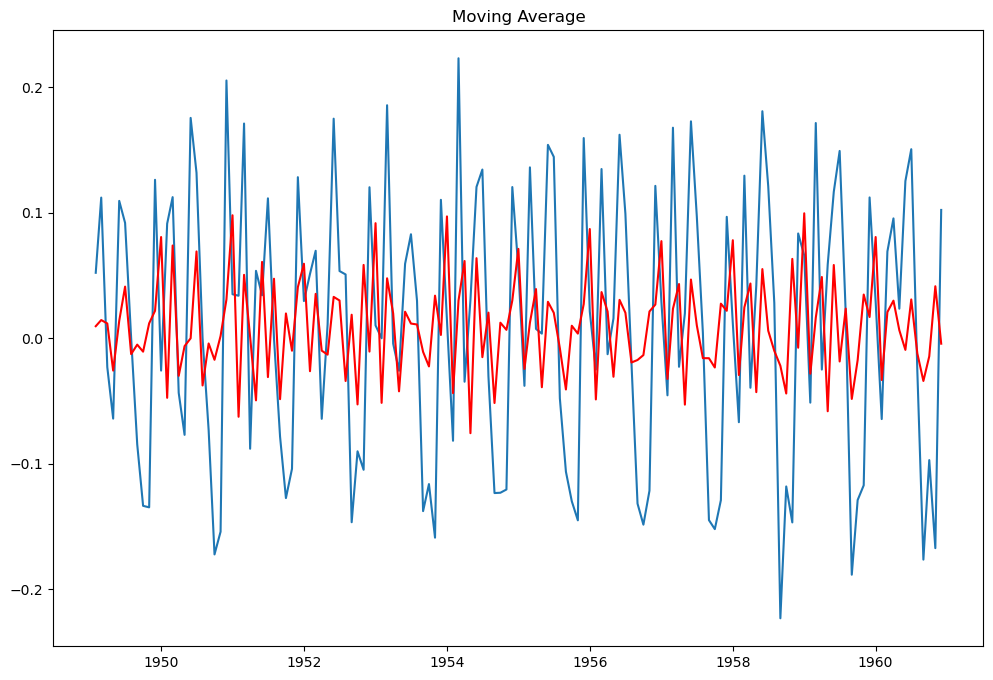

In [126]:
# Moving Average
MA_model = ARIMA(df_diff, order = (0, 0, 2))
MA_model_results = MA_model.fit()
plt.plot(df_diff)
plt.title("Moving Average")
plt.plot(MA_model_results.fittedvalues, color='red')

C:\Users\as\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\as\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\as\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\as\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


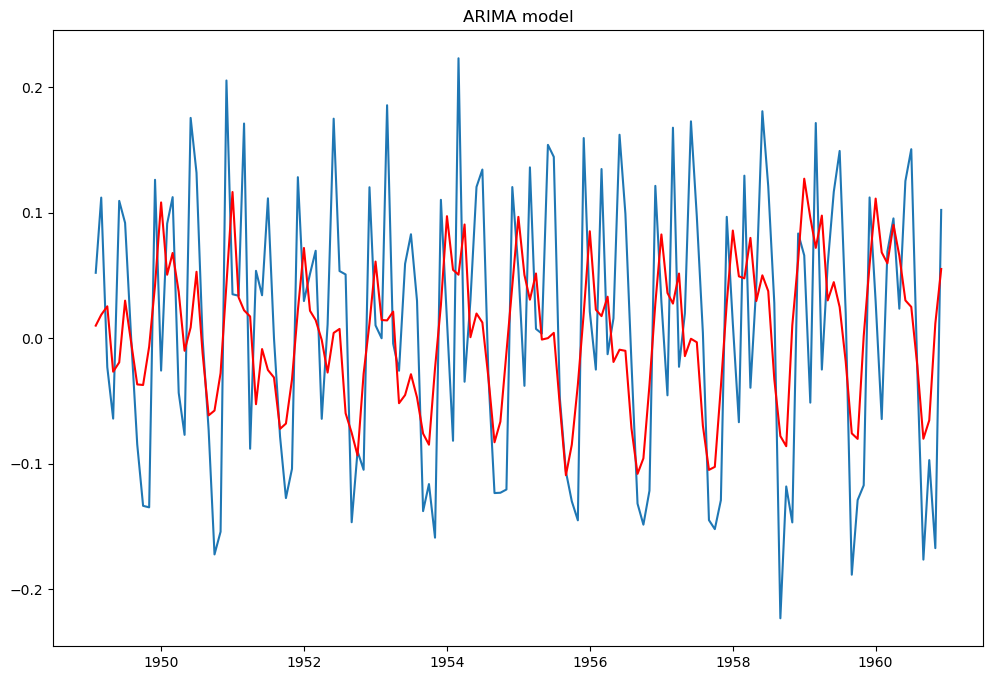

In [127]:
# ARIMA model
ARIMA_model = ARIMA(df_diff, order=(2, 0, 1))
ARIMA_results = ARIMA_model.fit()
plt.plot(df_diff)
plt.title("ARIMA model")
plt.plot(ARIMA_results.fittedvalues, color="red")

In [128]:
forecast_steps = 100  
forecast = ARIMA_results.get_forecast(steps=forecast_steps)

# Get forecasted values and confidence intervals
forecast_values = forecast.predicted_mean
confidence_intervals = forecast.conf_int()

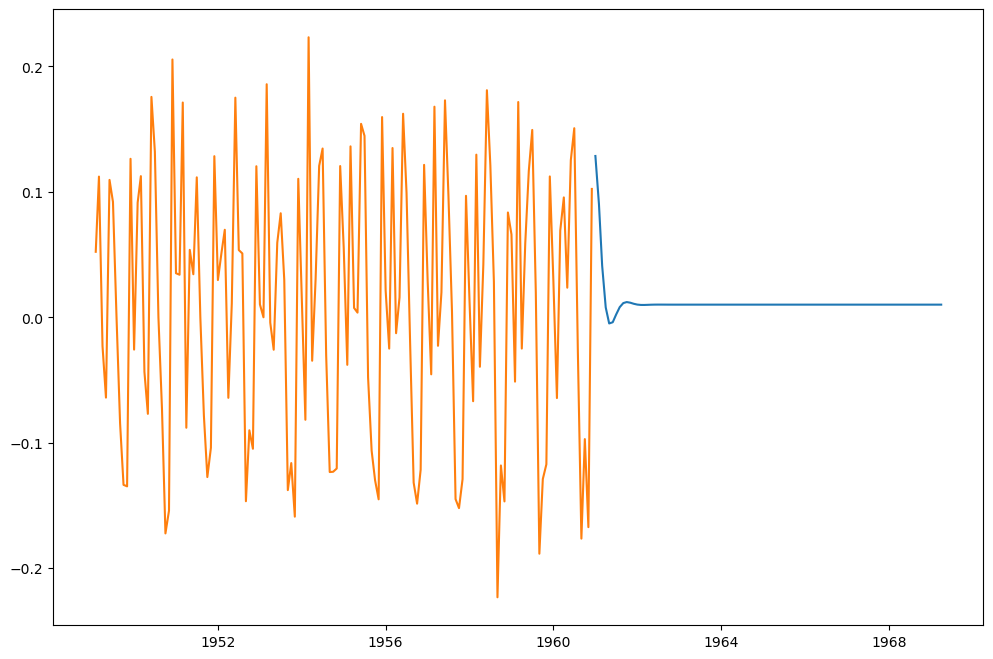

In [129]:
plt.plot(forecast_values.index,forecast_values.values)
plt.plot(df_diff.Passengers)

In [130]:
ARIMA_results

In [131]:
ARIMA_results.fittedvalues

Month
1949-02-01    0.010072
1949-03-01    0.018714
1949-04-01    0.025476
1949-05-01   -0.026634
1949-06-01   -0.019203
                ...   
1960-08-01   -0.022066
1960-09-01   -0.080075
1960-10-01   -0.065343
1960-11-01    0.011737
1960-12-01    0.055212
Length: 143, dtype: float64

In [132]:
ARIMA_results.fittedvalues.isna().sum()

0

In [133]:
df_diff

,Passengers
Month,
1949-02-01,0.052186
1949-03-01,0.112117
1949-04-01,-0.022990
1949-05-01,-0.064022
1949-06-01,0.109484
...,...
1960-08-01,-0.026060
1960-09-01,-0.176399
1960-10-01,-0.097083


In [134]:
df_diff.isna().sum()

Passengers    0
dtype: int64